In [18]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats,skew, kurtosis
from sklearn.preprocessing import LabelEncoder


In [19]:
data_df = pd.read_csv('games.csv', index_col= False)

In [20]:
data_df.columns = [
    'Game_ID',                # id
    'Rated_(T/F)',             # rated
    'Start_Time',              # created_at
    'End_Time',                # last_move_at
    'Number_of_Turns',         # turns
    'Game_Status',             # victory_status
    'Winner',                  # winner
    'Time_Increment',          # increment_code
    'White_Player-ID',         # white_id
    'White_Player_Rating',     # white_rating
    'Black_Player_ID',         # black_id
    'Black_Player_Rating',     # black_rating
    'All_Moves_in_Standard_Chess_Notation',  # moves
    'Opening_Eco',  # opening_eco
    'Opening_Name',            # opening_name
    'Opening_Ply'  # opening_ply
]

In [21]:
data_df.shape

(20058, 16)

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Game_ID                               20058 non-null  object 
 1   Rated_(T/F)                           20058 non-null  bool   
 2   Start_Time                            20058 non-null  float64
 3   End_Time                              20058 non-null  float64
 4   Number_of_Turns                       20058 non-null  int64  
 5   Game_Status                           20058 non-null  object 
 6   Winner                                20058 non-null  object 
 7   Time_Increment                        20058 non-null  object 
 8   White_Player-ID                       20058 non-null  object 
 9   White_Player_Rating                   20058 non-null  int64  
 10  Black_Player_ID                       20058 non-null  object 
 11  Black_Player_Ra

In [23]:
data_df.isnull().sum()

Game_ID                                 0
Rated_(T/F)                             0
Start_Time                              0
End_Time                                0
Number_of_Turns                         0
Game_Status                             0
Winner                                  0
Time_Increment                          0
White_Player-ID                         0
White_Player_Rating                     0
Black_Player_ID                         0
Black_Player_Rating                     0
All_Moves_in_Standard_Chess_Notation    0
Opening_Eco                             0
Opening_Name                            0
Opening_Ply                             0
dtype: int64

In [24]:
outliers = pd.DataFrame(columns=data_df.columns)

for column in data_df.select_dtypes(include=[float, int]).columns:
    z_scores = stats.zscore(data_df[column])
    # Store outliers based on z-score threshold
    outliers[column] = data_df[column][(z_scores > 4) | (z_scores < -4)]

outlier_counts = outliers.notnull().sum()
print(outlier_counts)


Game_ID                                  0
Rated_(T/F)                              0
Start_Time                               0
End_Time                                 0
Number_of_Turns                         31
Game_Status                              0
Winner                                   0
Time_Increment                           0
White_Player-ID                          0
White_Player_Rating                      0
Black_Player_ID                          0
Black_Player_Rating                      0
All_Moves_in_Standard_Chess_Notation     0
Opening_Eco                              0
Opening_Name                             0
Opening_Ply                              0
dtype: int64


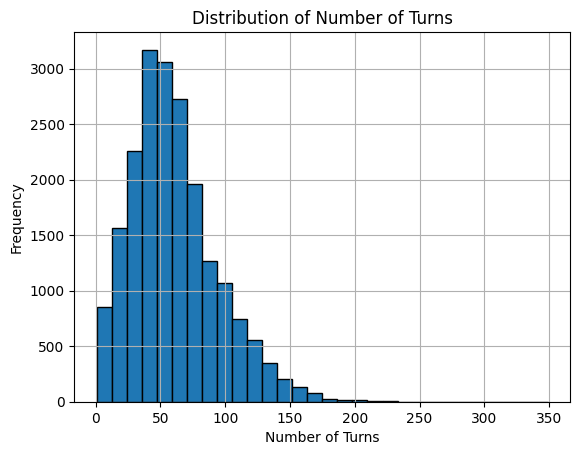

In [25]:
data_df['Number_of_Turns'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.show()

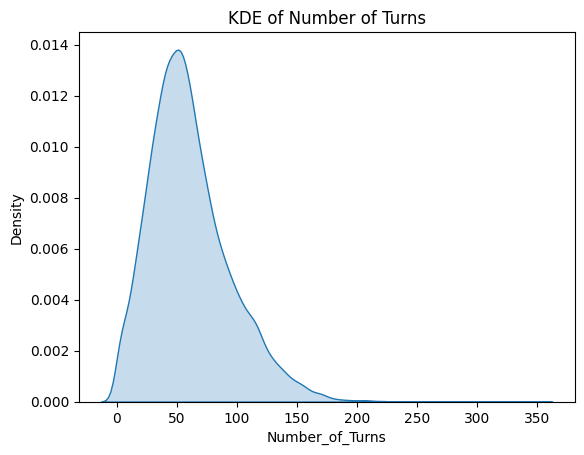

In [26]:
sns.kdeplot(data_df['Number_of_Turns'], fill=True)
plt.title('KDE of Number of Turns')
plt.show()

In [27]:


skewness = skew(data_df['Number_of_Turns'])
kurt = kurtosis(data_df['Number_of_Turns'])

print('Skewness:', skewness)
print('Kurtosis:', kurt)

Skewness: 0.89721666835643
Kurtosis: 1.3845162919776515


In [28]:
data_df['Number_of_Turns'] = mstats.winsorize(data_df['Number_of_Turns'], limits=[0.05, 0.05])



In [29]:
# Show Ouliers again.
utliers = pd.DataFrame(columns=data_df.columns)

for column in data_df.select_dtypes(include=[float, int]).columns:
    z_scores = stats.zscore(data_df[column])
    # Store outliers based on z-score threshold
    outliers[column] = data_df[column][(z_scores > 4) | (z_scores < -4)]

outlier_counts = outliers.notnull().sum()
print(outlier_counts)

Game_ID                                 0
Rated_(T/F)                             0
Start_Time                              0
End_Time                                0
Number_of_Turns                         0
Game_Status                             0
Winner                                  0
Time_Increment                          0
White_Player-ID                         0
White_Player_Rating                     0
Black_Player_ID                         0
Black_Player_Rating                     0
All_Moves_in_Standard_Chess_Notation    0
Opening_Eco                             0
Opening_Name                            0
Opening_Ply                             0
dtype: int64


In [30]:

data_df['Start_Time'] = pd.to_datetime(data_df['Start_Time'], unit='ms')
data_df['End_Time'] = pd.to_datetime(data_df['End_Time'], unit='ms')

# Step 4: Handle missing data - fill NaN with a default date (or drop rows if preferred)
data_df['Start_Time'] = data_df['Start_Time'].fillna(pd.Timestamp('1970-01-01'))
data_df['End_Time'] = data_df['End_Time'].fillna(pd.Timestamp('1970-01-01'))



# Step 5: Calculate the game duration in seconds (difference between End and Start Time)
data_df['Game_Duration'] = (data_df['End_Time'] - data_df['Start_Time']).dt.total_seconds()

# Step 6: Handle rows where Start_Time == End_Time, replacing with a reasonable duration (e.g., 1 second)
data_df.loc[data_df['Start_Time'] == data_df['End_Time'], 'Game_Duration'] = 1

# Check the result (first few rows)
print(data_df[['Start_Time', 'End_Time', 'Game_Duration']])



                   Start_Time                End_Time  Game_Duration
0     2017-08-31 20:06:40.000 2017-08-31 20:06:40.000          1.000
1     2017-08-30 21:53:20.000 2017-08-30 21:53:20.000          1.000
2     2017-08-30 21:53:20.000 2017-08-30 21:53:20.000          1.000
3     2017-08-30 16:20:00.000 2017-08-30 16:20:00.000          1.000
4     2017-08-29 18:06:40.000 2017-08-29 18:06:40.000          1.000
...                       ...                     ...            ...
20053 2017-07-11 16:35:14.342 2017-07-11 16:40:36.076        321.734
20054 2017-07-10 14:48:09.760 2017-07-10 15:00:33.979        744.219
20055 2017-07-10 14:44:37.493 2017-07-10 14:47:30.327        172.834
20056 2017-07-10 14:15:27.019 2017-07-10 14:31:13.718        946.699
20057 2017-07-09 23:32:32.649 2017-07-09 23:44:49.348        736.699

[20058 rows x 3 columns]


In [31]:
data_df.columns

Index(['Game_ID', 'Rated_(T/F)', 'Start_Time', 'End_Time', 'Number_of_Turns',
       'Game_Status', 'Winner', 'Time_Increment', 'White_Player-ID',
       'White_Player_Rating', 'Black_Player_ID', 'Black_Player_Rating',
       'All_Moves_in_Standard_Chess_Notation', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')

In [32]:
# Define nominal columns, including 'Game_ID' to encode but keep the original columns.
nominal_columns = [
    'Opening_Eco', 'Opening_Name', 'All_Moves_in_Standard_Chess_Notation',
    'Black_Player_ID', 'White_Player-ID', 'Game_Status', 'Game_ID'
]

# Filter out columns that are actually present in the DataFrame
columns_to_encode = [col for col in nominal_columns if col in data_df.columns]

label_encoder = LabelEncoder()

# Encode columns in place without adding "_Encoded" suffix
for column in columns_to_encode:
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Print the columns to confirm the encoding
print(data_df.columns)

# Save the DataFrame to CSV
data_df.to_csv("Clean_Chess_Data.csv", index=False)


Index(['Game_ID', 'Rated_(T/F)', 'Start_Time', 'End_Time', 'Number_of_Turns',
       'Game_Status', 'Winner', 'Time_Increment', 'White_Player-ID',
       'White_Player_Rating', 'Black_Player_ID', 'Black_Player_Rating',
       'All_Moves_in_Standard_Chess_Notation', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')


In [33]:
data_df.columns

Index(['Game_ID', 'Rated_(T/F)', 'Start_Time', 'End_Time', 'Number_of_Turns',
       'Game_Status', 'Winner', 'Time_Increment', 'White_Player-ID',
       'White_Player_Rating', 'Black_Player_ID', 'Black_Player_Rating',
       'All_Moves_in_Standard_Chess_Notation', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')